In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
print ("*************************************************************\n")
print ("Name of Program: Implementation of K-Means Clustering \n")
print ("Performed By: Prakhar Singh \n")
print ("Roll No.: BE21F06F062 \n")
print ("*************************************************************\n")

*************************************************************

Name of Program: Implementation of K-Means Clustering 

Performed By: Prakhar Singh 

Roll No.: BE21F06F062 

*************************************************************



In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/KNN_Dataset.csv",index_col=0)
dataset.head ()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
#Seperzate features and targets
X = dataset.iloc [:,:-1]
y = dataset.iloc [:,-1]
print ("Features: \n", X)
print ("Target: \n", y)

Features: 
           WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  
0    0.643798  0.879422  1.

In [6]:
# Data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit (X)
scaled_features = scaler.transform (X)

In [7]:
from tables import Column
scaled_dataset = pd. DataFrame (scaled_features)
#scaled_dataset = .dp maFeraDta (scaled_features, columns=dataset.columns [ : - 1 ] )
scaled_dataset.head ()

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (scaled_features,y,test_size=0.20)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=1)
knn.fit (X_train,y_train)
pred = knn.predict (X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix (y_test,pred))

[[82  8]
 [11 99]]


In [11]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        90
           1       0.93      0.90      0.91       110

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [12]:
error_rate= []

#Will take some time
for i in range (1,40):
    knn = KNeighborsClassifier (n_neighbors=i)
    knn.fit (X_train,y_train)
    pred_i = knn.predict (X_test)
    error_rate.append (np.mean (pred_i != y_test))

Text(0, 0.5, 'Error Rate')

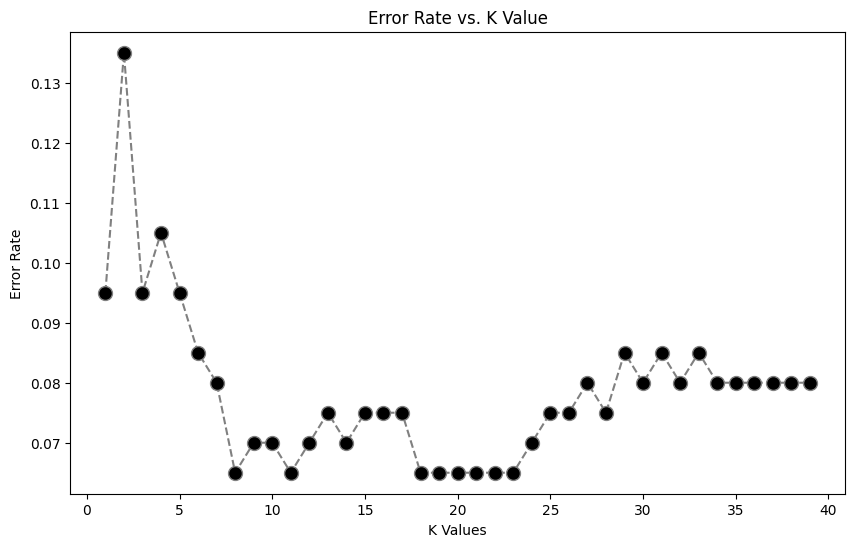

In [13]:
#Plot 'k' Vs Error
plt.figure (figsize= (10,6))
plt.plot (range (1,40),error_rate,color='gray', linestyle='dashed',
marker='o', markerfacecolor='black', markersize=10)
plt.title ('Error Rate vs. K Value')
plt.xlabel ('K Values')
plt.ylabel ('Error Rate')

In [14]:
#FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier (n_neighbors=1)
knn.fit (X_train,y_train)
pred = knn.predict (X_test)
print ('WITH K=1')
print ('\n')
print (confusion_matrix (y_test, pred) )
print ('\n')
print (classification_report (y_test, pred) )

WITH K=1


[[82  8]
 [11 99]]


              precision    recall  f1-score   support

           0       0.88      0.91      0.90        90
           1       0.93      0.90      0.91       110

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [15]:
#FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 20
knn = KNeighborsClassifier (n_neighbors=20)
knn.fit (X_train,y_train)
pred = knn.predict (X_test)
print ('WITH K=20')
print ('\n')
print (confusion_matrix (y_test, pred) )
print ('\n')
print (classification_report (y_test, pred) )

WITH K=20


[[ 83   7]
 [  6 104]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93        90
           1       0.94      0.95      0.94       110

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200



In [16]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit (X_train,y_train)
pred = knn.predict (X_test)
print ('WITH K=25 ' )
print ('\n')
print (confusion_matrix (y_test,pred))
print ('\n')
print (classification_report (y_test,pred) )

WITH K=25 


[[ 82   8]
 [  7 103]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92        90
           1       0.93      0.94      0.93       110

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200



In [17]:
#FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 27
knn = KNeighborsClassifier (n_neighbors=27)
knn.fit (X_train,y_train)
pred = knn.predict (X_test)
print ('WITH K=27')
print ('\n')
print (confusion_matrix (y_test, pred) )
print ('\n')
print (classification_report (y_test, pred) )

WITH K=27


[[ 81   9]
 [  7 103]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        90
           1       0.92      0.94      0.93       110

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

